In [ ]:
!sudo apt-get install -y xvfb ffmpeg x11-utils
!pip install -q 'gym==0.10.11'
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q 'pyglet==1.3.2'
!pip install -q pyvirtualdisplay
!pip install -q tf-agents
!pip install colabgymrender
!pip install gym_sokoban
!pip install gym
!apt-get install python-opengl -y
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install piglet
import gym
import gym_sokoban

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

from colabgymrender.recorder import Recorder
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
Display().start()
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,981 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 994 kB in 2s (465 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed

In [ ]:
import gym



from colabgymrender.recorder import Recorder
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from skimage import io, color
import gym
import random
import os
import numpy as np
from collections      import deque
from keras.models     import Sequential
from keras.layers     import Dense, Conv2D, Flatten
import tensorflow as tf

import seaborn as sns





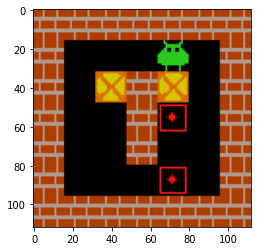

1000
Episode 0# steps: 151, total reward: -105.30000000000008, last reward: 0.1, rewards_list: [-1.0, -1.0, 0.1, -0.39999999999999997, -0.5, -1.0, -0.5, -0.5, -0.5, -1.0, -0.5, 0.1, 0.1, -0.5, -0.39999999999999997, 0.1, -0.5, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -0.5, 0.1, 0.1, -0.39999999999999997, -0.39999999999999997, -1.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -0.5, -1.0, -1.0, -0.5, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, 0.1, -0.39999999999999997, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, -1.0, -1.0, -1.0, 0.30000000000000004, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, -1.0, 0.1, -0.39999999999999997, -0.5, -1.0, -1.0, -1.0, -0.5, -1.0, -1.0, 0.1, -1.0, -1.0, 0.1, -1.0, -1.0, -1.0, -0.5, 0.1, -0.39999999999999997, -0.5, 0.1, 0.1, 0.1, -0.39999999999999997, -1.0, -1.0, 0.1, -0.39999999999999997, -1.0, -0.5, -1.0, -1.0, -1.0, 0.30000000000000004, -0.19999999999999996, -1.0, -1.

In [ ]:
env = gym.make("PushAndPull-Sokoban-v2")
screen = env.render(mode='rgb_array')
plt.imshow(screen)
observation = env.reset()
ipythondisplay.clear_output(wait=True)
ipythondisplay.display(plt.gcf())

class Agent():
    def __init__(self, state_size, action_size):
        self.weight_backup = "SOKOBAN_weight.h5"
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.learning_rate = 0.001  # @param {type:"number"}
        self.gamma = 0.95  # @param {type:"number"}
        self.exploration_rate = 0.4  # @param {type:"number"}
        self.exploration_min = 0.01  # @param {type:"number"}
        self.exploration_decay = 0.999  # @param {type:"number"}
        self.brain = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=self.state_size, padding='same'))
        model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=self.state_size, padding='same'))
        model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=self.state_size, padding='same'))
        model.add(Flatten())
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate))
        '''if os.path.isfile(self.weight_backup):
            model.load_weights(self.weight_backup)
            self.exploration_rate = self.exploration_min'''
        return model

    def save_model(self):
        self.brain.save(self.weight_backup)

    def act(self, state):
        if np.random.rand() <= self.exploration_rate:
            return random.randrange(self.action_size)
        act_values = self.brain.predict(state)
        return np.argmax(act_values)

    def remember(self, state, action, reward, next_state, done, info):
        self.memory.append((state, action, reward, next_state, done, info))

    def replay(self, sample_batch_size):
        if len(self.memory) < sample_batch_size:
            return
        sample_batch = random.sample(self.memory, sample_batch_size)
        for state, action, reward, next_state, done, info in sample_batch:
            target = reward

            if not done:
                target = reward + self.gamma * np.amax(self.brain.predict(next_state)[0])
            target_f = self.brain.predict(state)
            target_f[0][action] = target
            self.brain.fit(next_state, target_f, epochs=1, verbose=0)
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay

class Sokoban:
    def __init__(self):
        self.sample_batch_size = 64 # @param {type:"integer"}
        self.episodes          =  1000



        # @param {type:"integer"}
        self.env               = gym.make('PushAndPull-Sokoban-v2')

        self.state_size        =  (80, 80, 1)
        self.action_size       = self.env.action_space.n
        self.agent             = Agent(self.state_size, self.action_size)


    def run(self):

        counts = []
        rewards = []
        try:
            print(self.episodes)
            for index_episode in range(self.episodes):
                state = self.env.reset()

                state = color.rgb2gray(state[16:96, 16:96]).reshape(1, 80, 80, 1)

                done = False
                index = 0
                total_reward = list()
                while not done:
#                    self.env.render()
                    action = self.agent.act(state)


                    next_state, reward, done, info = self.env.step(action)

                    if info['action.name'] == "no operation":
                        reward += -0.5
                    if info["action.moved_box"]:
                        reward += 0.2
                    if info["action.moved_player"]:
                        reward += 0.2
                    else:
                        reward += -0.4
                    if "all_boxes_on_target" in info.keys():
                        if info["all_boxes_on_target"]:
                            reward += 1000

                    total_reward.append(reward)
                    next_state = color.rgb2gray(next_state[16:96, 16:96]).reshape(1, 80, 80, 1)
                    self.agent.remember(state, action, reward, next_state, done, info)
                    state = next_state
                    index += 1
                temp = sum(total_reward)
                print("Episode {}# steps: {}, total reward: {}, last reward: {}, rewards_list: {}".format(index_episode, index + 1, temp, reward, total_reward))
                counts.append(index)
                rewards.append(temp)
                self.agent.replay(self.sample_batch_size)
        finally:
            self.agent.save_model()
        return counts, rewards

sokoban = Sokoban()
counts,rewards = sokoban.run()


In [ ]:
import matplotlib.pyplot as plt
sns.distplot(counts, bins=10)
print(counts)
plt.title("Distribution of number of steps")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rewards)
print(rewards)
plt.title("y: total reward, x: episods")